NOAA weather dataset from JFK Airport - Mini Project

Project Brief
In this project, we explore and clean the NOAA weather dataset from JFK Airport. The dataset contains hourly weather observations, including temperature, humidity, wind speed, and more, spanning from 2010 to 2018. We will load the dataset into a pandas DataFrame, inspect for missing values, and handle them appropriately by filling or removing them. The cleaned data will then be visualized using histograms to understand the distribution of temperature data. Finally, the cleaned dataset will be prepared for further analysis or machine learning tasks. This project demonstrates basic data cleaning, exploration, and visualization techniques

License and Usage
The dataset is sourced from the NOAA JFK weather station and is shared under the CDLA-Sharing 1.0 license. I will use this data for analysis and model training, ensuring I don’t add restrictions or misuse the data, following the terms outlined in the license.


    Step 1: Install Required Libraries
Before we begin, we need to install a couple of Python libraries. These libraries will help us load and analyze the dataset:

pandas:   for handling data in tabular form (CSV files).
pardata:  for quick access to datasets (optional, for direct loading).

!pip install pandas
!pip install pardata

    Step 2: Import Libraries
Now that the libraries are installed, let's import them so we can use them in our analysis.

To work with the data, we will import the necessary Python libraries:

pandas:     for data manipulation
pardata:    to load datasets quickly

In [1]:
import pandas as pd
import pardata

    Step 3: Load the Dataset

Now, let's load the dataset from a CSV file into a pandas DataFrame. 
-low_memory=False option in the read_csv function. It tells pandas to process the file in chunks, which can help with large datasets, wheresome columns in the CSV file contain different data types (for example, a mix of strings and numbers), which could lead to inconsistencies in how pandas handles the data.


In [2]:
df = pd.read_csv('jfk_weather.csv', low_memory = False)


To check the total number of columns the DataFrame - 114 546 rows and 90 columns.

In [3]:
print(df.shape)


(114545, 90)


    Step 4: Display the First Few Rows
Let's view the first few rows of the dataset to understand its structure.

We can display the first few rows of the dataset using the head() method.
This will give us a snapshot of the data and allow us to see what the dataset looks like.

In [4]:
print(df.head())


      STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
1  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
2  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
3  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
4  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   

   LONGITUDE              DATE REPORTTPYE           HOURLYSKYCONDITIONS  \
0   -73.7622  2010-01-01 00:51      FM-15  FEW:02 7 SCT:04 13 BKN:07 29   
1   -73.7622  2010-01-01 01:00      FM-12                           NaN   
2   -73.7622  2010-01-01 01:51      FM-15  FEW:02 6 SCT:04 13 OVC:08 35   
3   -73.7622  2010-01-01 02:03      FM-16  FEW:02 6 SCT:04 13 OVC:08 35   
4   -73.7622  2010-01-01 02:28      FM-16  BKN:07 7 BKN:07 15 OVC:08 35   

  HOURLYVISIBILITY                      HOURLYPRSENTWEATHERTYPE  ...  \
0             6.00  -RA:02 PL:06 BR:1 |RA:61 PL:74

    Step 5: Check for Missing Data

It's important to check if there are any missing values in the dataset before starting analysis. 
This can affect the model's performance.

We can check for missing values in the dataset by using the 

    isnull().sum() method. 

This will show us how many missing values exist in each column.
If there are missing values, we can decide how to handle them (e.g., filling them with the mean, removing rows, etc.).


In [5]:
print(df.isnull().sum())

STATION                                   0
STATION_NAME                              0
ELEVATION                                 0
LATITUDE                                  0
LONGITUDE                                 0
                                      ...  
MonthlyTotalCoolingDegreeDays        114444
MonthlyDeptFromNormalHeatingDD       114444
MonthlyDeptFromNormalCoolingDD       114444
MonthlyTotalSeasonToDateHeatingDD    114544
MonthlyTotalSeasonToDateCoolingDD    114544
Length: 90, dtype: int64


    Step 6: Handle Missing Data

Step 6: Handle Missing Data

From the output of `df.isnull().sum()`, we can see that five columns listed (such as `MonthlyTotalCoolingDegreeDays`, `MonthlyDeptFromNormalHeatingDD`, and others) have  114,444 missing values. 

However, the important point to note is that these missing values are confined to those five specific columns. All the other columns in the dataset have **no missing data** (as indicated by the `0` values in the `isnull().sum()` result).

Out of the 114,546 total rows** in the dataset, only five columns have missing data for 114,444 of those rows.

This means the missing values are highly concentrated in these specific columns, and we need to handle them either by filling the missing values or removing them, depending on our analysis goals.

Given that these columns have little to no information and their missing data count is almost equal to the total number of rows, we decided to drop these columns from the dataset.

These columns are not providing any valuable insights and may not contribute to our analysis or models.







    

    List columns with missing data

    df.columns: 
This part refers to the column headers (or names) of your DataFrame df. A DataFrame is essentially a table, much like you would see in a spreadsheet, where each column has a name.


    df.isnull(): 
This function goes through each cell in the DataFrame and checks if there is missing data (NaN, stands for "Not a Number"). It returns a new DataFrame of the same size where each cell is either True (if the original cell was missing) or False (if the original cell had data).

    .sum(): 
When used right after isnull(), this function adds up all the True values for each column. Since True is considered as 1 and False as 0, the sum represents the total number of missing values in each column.

    > 1: 
This part checks which columns have more than 1 missing value. It compares the sum of missing values in each column to 1, and for columns where the number is greater, it returns True; otherwise, it returns False.

    df.columns[...]:
The square brackets are used for filtering. Only the column names where the condition inside the brackets (df.isnull().sum() > 1) is True are selected. This results in a list of column names that have more than one missing value.

    print(columns_with_missing_data): 
Finally, this line prints out the list of column names that have more than one missing value.

In [6]:
# List columns with missing data
columns_with_missing_data = df.columns[df.isnull().sum() > 1]
print(columns_with_missing_data)


Index(['HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY', 'HOURLYPRSENTWEATHERTYPE',
       'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC', 'HOURLYWETBULBTEMPF',
       'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF', 'HOURLYDewPointTempC',
       'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 'HOURLYWindDirection',
       'HOURLYWindGustSpeed', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp',
       'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYAverageWetBulbTemp', 'DAILYHeatingDegreeDays',
       'DAILYCoolingDegreeDays', 'DAILYWeather', 'DAILYPrecip',
       'DAILYSnowfall', 'DAILYSnowDepth', 'DAILYAverageStationPressure',
       'DAILYAverageSeaLevelPressure', 'DAILYAverageWindSpeed',
       'DAILYPeakWindSpeed', 'PeakWindDirection', 'DAILY


    Calculate Missing Percentages: 
The percentage of missing values in each column of the DataFrame is calculated.

    Filter Columns: 
Columns where more than 80% of the values are missing are identified. This threshold can be modified based on different needs, such as increasing sensitivity to missing data by lowering the percentage or targeting columns with higher data completeness by raising it.

In [7]:
# Calculate the percentage of missing data for each column
missing_percent = df.isnull().sum() * 100 / len(df)

# Filter columns where missing data is more than 10%
columns_to_drop = missing_percent[missing_percent > 80].index






    Determine Maximum Column Width: 
The length of the longest column name among those to be dropped is determined to help format the output neatly.

    Output Column Names and Missing Percentages:
Each column identified for potential removal, along with its percentage of missing data, is printed. The output is formatted such that all percentages are aligned for easy reading, facilitated by adjusting the spacing based on the longest column name.

In [8]:
# Calculate the longest column name to align the percentages
longest_column = max(len(column) for column in columns_to_drop)

# Print the header
print("Columns to drop and their missing data percentage:")

# Print each column and its corresponding percentage of missing data
for column in columns_to_drop:
    # Adjust the space between the column name and the percentage
    space_padding = longest_column + 2  # You can adjust '+2' for more or less space as needed
    print(f"{column.ljust(space_padding)} {missing_percent[column]:>6.2f}%")


Columns to drop and their missing data percentage:
HOURLYPRSENTWEATHERTYPE              82.56%
HOURLYWindGustSpeed                  86.49%
DAILYMaximumDryBulbTemp              90.51%
DAILYMinimumDryBulbTemp              90.45%
DAILYAverageDryBulbTemp              91.54%
DAILYDeptFromNormalAverageTemp       91.54%
DAILYAverageRelativeHumidity         97.79%
DAILYAverageDewPointTemp             97.70%
DAILYAverageWetBulbTemp              97.70%
DAILYHeatingDegreeDays               91.54%
DAILYCoolingDegreeDays               91.54%
DAILYWeather                         98.71%
DAILYPrecip                          95.52%
DAILYSnowfall                        97.27%
DAILYSnowDepth                       95.82%
DAILYAverageStationPressure          97.27%
DAILYAverageSeaLevelPressure         97.70%
DAILYAverageWindSpeed                97.28%
DAILYPeakWindSpeed                   97.33%
PeakWindDirection                    97.33%
DAILYSustainedWindSpeed              97.28%
DAILYSustainedWindDirecti

In [9]:

#Drop these columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)


In [10]:
print(df.isnull().sum())

STATION                               0
STATION_NAME                          0
ELEVATION                             0
LATITUDE                              0
LONGITUDE                             0
DATE                                  0
REPORTTPYE                            0
HOURLYSKYCONDITIONS               21210
HOURLYVISIBILITY                  18081
HOURLYDRYBULBTEMPF                 3140
HOURLYDRYBULBTEMPC                 3140
HOURLYWETBULBTEMPF                 3298
HOURLYWETBULBTEMPC                 3298
HOURLYDewPointTempF                3148
HOURLYDewPointTempC                3148
HOURLYRelativeHumidity             3148
HOURLYWindSpeed                    3187
HOURLYWindDirection                3308
HOURLYStationPressure              3289
HOURLYPressureTendency            66507
HOURLYPressureChange              85375
HOURLYSeaLevelPressure            15023
HOURLYPrecip                      34782
HOURLYAltimeterSetting            27667
DAILYSunrise                          0


In [11]:
print(df.columns)


Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY',
       'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC', 'HOURLYWETBULBTEMPF',
       'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF', 'HOURLYDewPointTempC',
       'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 'HOURLYWindDirection',
       'HOURLYStationPressure', 'HOURLYPressureTendency',
       'HOURLYPressureChange', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting', 'DAILYSunrise', 'DAILYSunset',
       'MonthlyMaxSeaLevelPressureDate', 'MonthlyMaxSeaLevelPressureTime',
       'MonthlyMinSeaLevelPressureDate', 'MonthlyMinSeaLevelPressureTime'],
      dtype='object')


    Steps to Fill Missing Values with Median

A) Identification of Numeric Columns
It is generally recommended to identify whether the columns are numeric before any statistical calculations. This is essential because medians are only applicable to numerical data.

B) Conversion to Numeric Format
Columns intended for median calculations should be converted to numeric formats if they are not already. This step prevents errors during the calculation process and ensures data compatibility.

C) Median Calculation and Data Imputation
Rather than adjusting the DataFrame through potentially error-prone methods, it is preferred to directly replace missing values with the median. This method of direct assignment is typically used to avoid complications and maintain data integrity.


In [12]:

# Import necessary library
import pandas as pd

# Define columns to process
columns_to_process = [
    'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF', 
    'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 
    'HOURLYWindDirection', 'HOURLYStationPressure', 'HOURLYPressureTendency', 
    'HOURLYPressureChange', 'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting'
]

# Convert to numeric and handle non-numeric issues
for column in columns_to_process:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the median and fill missing values directly in the DataFrame
for column in columns_to_process:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)
    print(f"Filled missing values in {column} with median: {median_value}")



Filled missing values in HOURLYVISIBILITY with median: 10.0
Filled missing values in HOURLYDRYBULBTEMPF with median: 56.0
Filled missing values in HOURLYWETBULBTEMPF with median: 50.0
Filled missing values in HOURLYDewPointTempF with median: 45.0
Filled missing values in HOURLYRelativeHumidity with median: 69.0
Filled missing values in HOURLYWindSpeed with median: 10.0
Filled missing values in HOURLYWindDirection with median: 200.0
Filled missing values in HOURLYStationPressure with median: 29.99
Filled missing values in HOURLYPressureTendency with median: 5.0
Filled missing values in HOURLYPressureChange with median: 0.0
Filled missing values in HOURLYSeaLevelPressure with median: 30.02
Filled missing values in HOURLYPrecip with median: 0.0
Filled missing values in HOURLYAltimeterSetting with median: 30.01


In [13]:
df.isnull().sum()

STATION                               0
STATION_NAME                          0
ELEVATION                             0
LATITUDE                              0
LONGITUDE                             0
DATE                                  0
REPORTTPYE                            0
HOURLYSKYCONDITIONS               21210
HOURLYVISIBILITY                      0
HOURLYDRYBULBTEMPF                    0
HOURLYDRYBULBTEMPC                 3140
HOURLYWETBULBTEMPF                    0
HOURLYWETBULBTEMPC                 3298
HOURLYDewPointTempF                   0
HOURLYDewPointTempC                3148
HOURLYRelativeHumidity                0
HOURLYWindSpeed                       0
HOURLYWindDirection                   0
HOURLYStationPressure                 0
HOURLYPressureTendency                0
HOURLYPressureChange                  0
HOURLYSeaLevelPressure                0
HOURLYPrecip                          0
HOURLYAltimeterSetting                0
DAILYSunrise                          0


Dropping Fahrenheit Columns and Sky Condition

The following columns will be dropped because they are either redundant or incomplete:

Fahrenheit Columns:
These columns are not needed for our analysis since the Celsius data is already complete. If Fahrenheit values are required in the future, they can be easily converted from Celsius.

Sky Condition Column:
This column is not relevant for our current analysis and has a large amount of missing data, so it will be removed to keep the dataset simpler.

In [14]:
# columns you we want to drop
columns_to_drop = [
    'HOURLYDRYBULBTEMPF', 
    'HOURLYWETBULBTEMPF', 
    'HOURLYDewPointTempF',
    'HOURLYSKYCONDITIONS'
]

# Drop these columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Verify they been removed
print("Remaining columns in the DataFrame:")
print(df.columns)

Remaining columns in the DataFrame:
Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPC',
       'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempC', 'HOURLYRelativeHumidity',
       'HOURLYWindSpeed', 'HOURLYWindDirection', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYSunrise', 'DAILYSunset', 'MonthlyMaxSeaLevelPressureDate',
       'MonthlyMaxSeaLevelPressureTime', 'MonthlyMinSeaLevelPressureDate',
       'MonthlyMinSeaLevelPressureTime'],
      dtype='object')



    Sample of the dataset 

From an Excel file, where information from the columns being dropped is shown. The data in these columns is either coded, incomplete, or redundant, making them unnecessary for further analysis. This preview helps visualize what is being removed before finalizing the dataset cleanup.

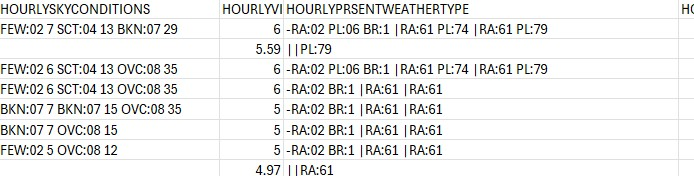

In [15]:
from IPython.display import Image, display 


image_path = "img1.jpg" 

# Display the image / The asample from Data set, the collumns being dropped

display(Image(filename=image_path))


    Further Obectives: 

1️ Temperature Trends Over Time
Plot: Line graph of hourly temperatures over a selected time period (e.g., one month, one year).
Why?: Helps identify seasonal changes, anomalies, or general temperature trends at JFK Airport.

2️ Distribution of Wind Speed
Plot: Histogram or KDE (Kernel Density Estimation) plot.
Why?: Shows the frequency of different wind speeds, useful for understanding common wind patterns.

3️ Correlation Between Humidity and Temperature
Plot: Scatter plot of HOURLYRelativeHumidity vs HOURLYDRYBULBTEMPC.
Why?: Helps visualize how humidity changes with temperature and if there's a linear/non-linear relationship.

4️ Hourly Precipitation Intensity
Plot: Boxplot or violin plot of HOURLYPrecip for each hour of the day.
Why?: Helps understand at what times precipitation is most frequent or intense.

5️ Wind Direction Analysis
Plot: Wind rose plot (using matplotlib or windrose library).
Why?: Provides insights into the prevailing wind directions at JFK Airport.

    1 Visualizing Temperature Trends at JFK Airport for 2017
Purpose of the Plot
The plot is designed to show how the temperature changes hour by hour throughout the year 2017 at JFK Airport. This visualization helps us see the trends, like when it gets hotter or colder, which can be crucial for understanding seasonal changes.

Steps Taken to Create the Plot

Loading Data: We start by loading our cleaned weather data.

Preparing Data: We make sure the dates in our data are in a format that our plotting tool understands. We then pick out the data just for the year 2017.

Sorting Data: The data is sorted by date to make sure it appears in order in our plot.

Creating the Plot:
    We set up a plot with a specific size.
    We plot the temperature against dates.
    We add labels and a title to make it clear what the plot is showing.
    A grid is added to the plot to make it easier to read the temperatures and dates.

Displaying the Plot: Finally, we display the plot.



    What We Learn from the Plot
This plot is a straightforward way to visualize the hourly temperature variations throughout the year. By looking at the plot, one can easily spot the warmer months versus the colder ones and any unusual temperature spikes or drops. It’s a useful tool for anyone trying to understand weather patterns at JFK Airport.

    Output-1    Visualizing Temperature Trends at JFK Airport for 2017

Purpose of the Plot
The plot is designed to show how the temperature changes hour by hour throughout the year 2017 at JFK Airport. This visualization helps us see the trends, like when it gets hotter or colder, which can be crucial for understanding seasonal changes.



    Change Date to Right Format:
Convert the dates in the data to a type that the computer understands. This makes sure we can sort them and find dates easily.

    Pick Data from 2017:
Only look at weather data from the year 2017. This means we ignore data from other years.

    Put Dates in Order:
Arrange the data so that it starts with the earliest date and goes to the latest. This helps us see how things change over time.

    Draw Line of Temperatu`re:
Draw a line on a graph to show how the temperature changed throughout 2017. This line helps us see the temperature trend.

    Write Title on Graph, Mark Date and Temperature, and Add Lines for Easy Reading:
Add a title to the graph to tell people what it shows. Also, label the dates and temperature on the graph so it’s clear what the numbers and dates mean. Put grid lines on the graph, which makes it easier to read the exact values.

    Show What Line Means:
Add a label that explains what the line on the graph is about. This helps anyone looking at the graph understand what they are seeing.

    Show the Graph:
Make the graph visible on the screen. This lets us see what the weather was like by looking at the temperature changes graphed out.

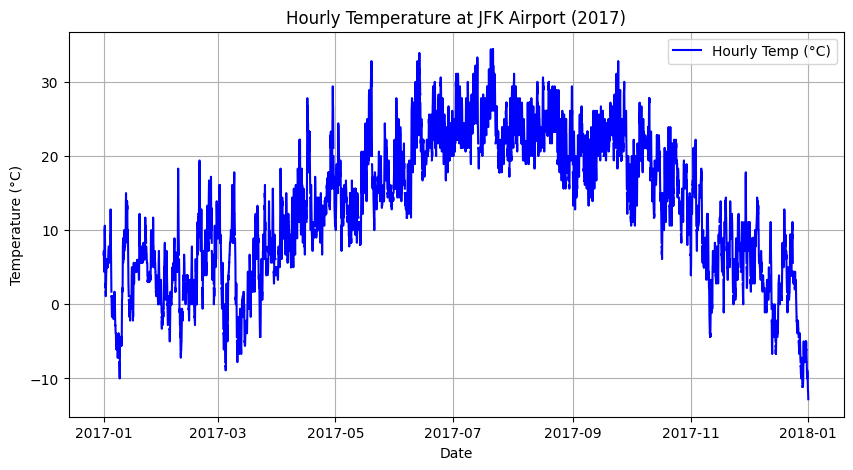

In [16]:
# Convert 'DATE' column to datetime format to handle dates correctly.
df['DATE'] = pd.to_datetime(df['DATE'])

# Convert 'HOURLYDRYBULBTEMPC' column to numeric, coercing errors to NaN to handle non-numeric data gracefully.
df['HOURLYDRYBULBTEMPC'] = pd.to_numeric(df['HOURLYDRYBULBTEMPC'], errors='coerce')

# Filter data for the year 2017 and sort it by date to prepare for plotting.
df_2017 = df[df['DATE'].dt.year == 2017].sort_values('DATE')

# Import necessary libraries for data manipulation and plotting.
import pandas as pd
import matplotlib.pyplot as plt

# Set up the plot with a specific figure size.
plt.figure(figsize=(10, 5))

# Create a line plot of hourly temperature over dates in 2017, set the label and line color.
plt.plot(df_2017['DATE'], df_2017['HOURLYDRYBULBTEMPC'], label='Hourly Temp (°C)', color='blue')

# Set the title of the plot to indicate what the graph represents.
plt.title('Hourly Temperature at JFK Airport (2017)')

# Label the x-axis as 'Date'.
plt.xlabel('Date')

# Label the y-axis as 'Temperature (°C)'.
plt.ylabel('Temperature (°C)')

# Display the legend to identify plotted data easily.
plt.legend()

# Enable grid lines for easier reading of the plot.
plt.grid(True)

# Display the plot on the screen.
plt.show()


    Output-1 Correlation Between Humidity and Temperature

Objective:
To visualise the relationship between hourly relative humidity and temperature using a scatter plot.

Steps:
Import Libraries
Bring in the necessary libraries (pandas for data manipulation and matplotlib.pyplot for plotting).

Ensure Numeric Data
Convert the HOURLYRelativeHumidity and HOURLYDRYBULBTEMPC columns to numeric format to avoid issues during plotting.

Set Plot Size
Define the size of the figure for better visibility of the scatter plot.

Create Scatter Plot
Plot HOURLYDRYBULBTEMPC (Temperature in Celsius) on the x-axis and HOURLYRelativeHumidity (Relative Humidity in %) on the y-axis.

Add Title and Labels
Add a title to explain the plot's purpose and label both axes (Temperature (°C) for x-axis and Relative Humidity (%) for y-axis).

Enable Grid
Turn on gridlines to make the plot easier to interpret.

Display the Plot
Use the show() function to display the scatter plot on the screen.

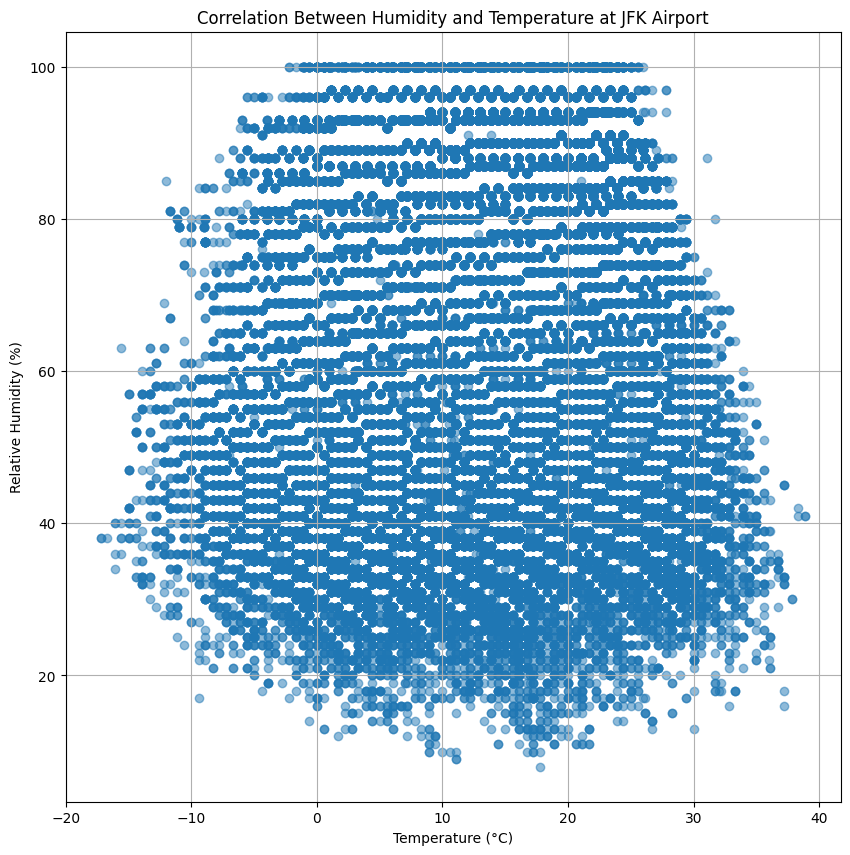

In [17]:
# Import necessary libraries for data manipulation and plotting.
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the humidity and temperature columns are in numeric format.
df['HOURLYRelativeHumidity'] = pd.to_numeric(df['HOURLYRelativeHumidity'], errors='coerce')
df['HOURLYDRYBULBTEMPC'] = pd.to_numeric(df['HOURLYDRYBULBTEMPC'], errors='coerce')

# Set up the plot with a specific figure size.
plt.figure(figsize=(10, 10))

# Create a scatter plot of humidity versus temperature.
plt.scatter(df['HOURLYDRYBULBTEMPC'], df['HOURLYRelativeHumidity'], alpha=0.5)

# Set the title of the plot to indicate what the graph represents.
plt.title('Correlation Between Humidity and Temperature at JFK Airport')

# Label the x-axis as 'Temperature (°C)'.
plt.xlabel('Temperature (°C)')

# Label the y-axis as 'Relative Humidity (%)'.
plt.ylabel('Relative Humidity (%)')

# Show a grid to make the plot easier to read.
plt.grid(True)

# Display the plot on the screen.
plt.show()


     Output-3  Distribution of Wind Speed

    Objective:
To explore the distribution of wind speeds using a histogram and/or KDE plot.

    Steps:
Import Libraries
Use the required libraries (pandas for handling data and matplotlib.pyplot for creating plots).

Ensure Numeric Data
Convert the HOURLYWindSpeed column to numeric format to ensure all values are properly handled.

Set Plot Size
Define the size of the figure to make the plot visually clear.

Create Histogram
Plot a histogram to show the frequency of different wind speeds.

Add KDE Plot
Overlay a Kernel Density Estimation (KDE) plot for a smoother view of wind speed distribution.

Add Title and Labels
Add a title to describe the plot and label the x-axis (Wind Speed (mph)) and y-axis (Frequency).

Enable Grid
Turn on gridlines to make the plot easier to interpret.

Display the Plot
Use the show() function to display the plot.

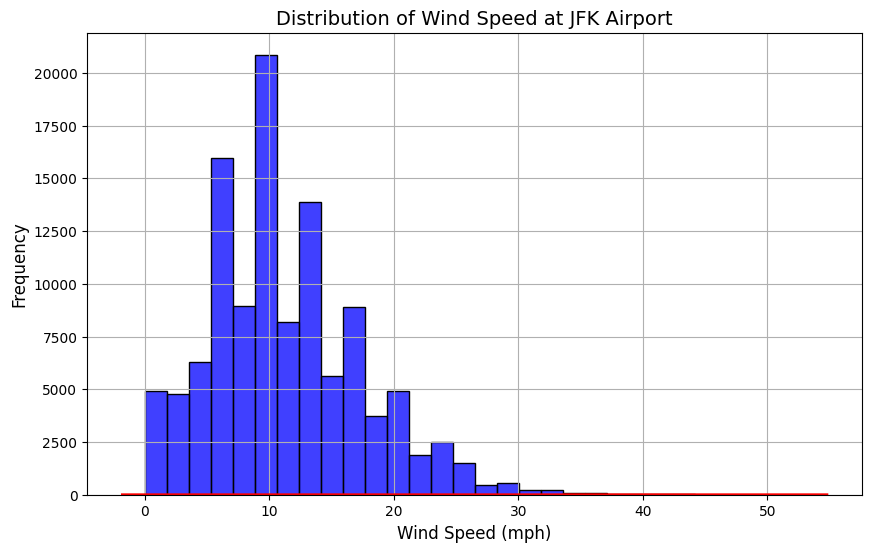

In [18]:
# Import necessary libraries
import pandas as pd                     # For data handling and manipulation
import matplotlib.pyplot as plt         # For creating plots
import seaborn as sns  # For KDE plot (Kernel Density Estimation)

# Ensure wind speed data is in numeric format
df['HOURLYWindSpeed'] = pd.to_numeric(df['HOURLYWindSpeed'], errors='coerce')  
# Converts wind speed column to numeric and handles invalid values

# Set up the figure size
plt.figure(figsize=(10, 6))  
# Creates a larger plot for better readability

# Plot a histogram of wind speed
sns.histplot(df['HOURLYWindSpeed'], kde=False, bins=30, color='blue', edgecolor='black')  
# Displays frequency of wind speeds using 30 bins and adds black edges to the bars

# Overlay a KDE plot
sns.kdeplot(df['HOURLYWindSpeed'], color='red', linewidth=2)  
# Adds a smooth curve showing the density of wind speeds

# Add a title and labels
plt.title('Distribution of Wind Speed at JFK Airport', fontsize=14)  
# Describes what the graph is about
plt.xlabel('Wind Speed (mph)', fontsize=12)  
# Labels the x-axis with the variable being plotted
plt.ylabel('Frequency', fontsize=12)  
# Labels the y-axis to show the count of occurrences

# Add gridlines
plt.grid(True)  
# Makes the plot easier to read by adding gridlines

# Display the plot
plt.show()  
# Shows the plot on the screen


    Summary for outcome 3: Wind Speed Distribution at JFK Airport

This graph illustrates the distribution of wind speeds recorded at JFK Airport. The blue bars represent how frequently different wind speeds occur, with most falling between 5–15 mph, indicating mild winds are most common. The horizontal axis shows wind speed (in mph), while the vertical axis represents frequency, or how often each wind speed was recorded. A red line highlights the general pattern, showing that higher wind speeds above 30 mph are rare. This analysis helps understand typical wind patterns at JFK Airport, which could be useful for aviation, weather predictions, or operational planning. 
